In [ ]:
pip install tensorflow numpy matplotlib scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


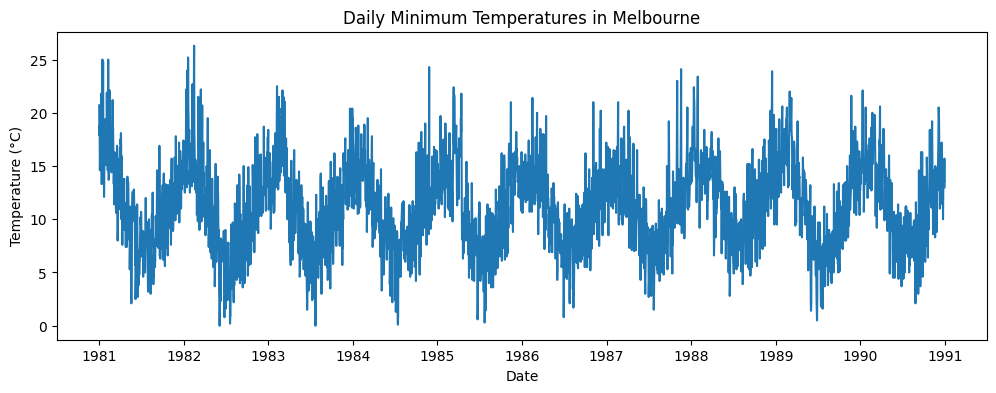

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])

# Display dataset
print(df.head())

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


In [ ]:
# Use only temperature values
data = df['Temp'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_length = 30  # Use 30 days to predict the next day
X, y = create_sequences(data_scaled, seq_length)

# Train-test split (80% train)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train shape:", X_train.shape)  # (samples, timesteps, features)


X_train shape: (2896, 30, 1)


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.1, verbose=1)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0366 - val_loss: 0.0119
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0125 - val_loss: 0.0110
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - val_loss: 0.0122
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0091 - val_loss: 0.0103
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


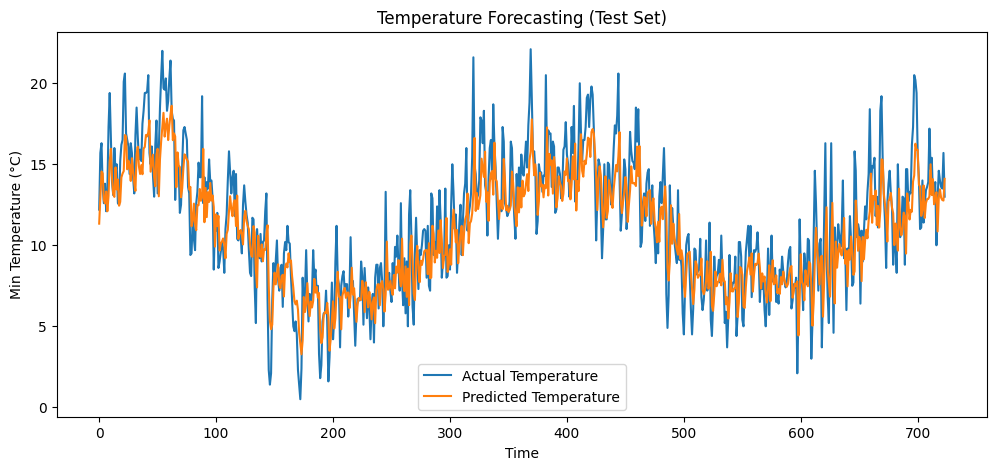

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot true vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(y_pred_inv, label='Predicted Temperature')
plt.title('Temperature Forecasting (Test Set)')
plt.xlabel('Time')
plt.ylabel('Min Temperature (°C)')
plt.legend()
plt.show()
